In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Unemployment in India.csv")

# Show the first 5 rows
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [2]:
# Check column names and data types
print("Column Names and Types:")
print(df.dtypes)

# Check if there are any missing values
print("\nMissing Values:")
print(df.isnull().sum())


Column Names and Types:
Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

Missing Values:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [4]:
# Remove rows with missing values
df = df.dropna()

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Convert the Date column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Show cleaned data
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


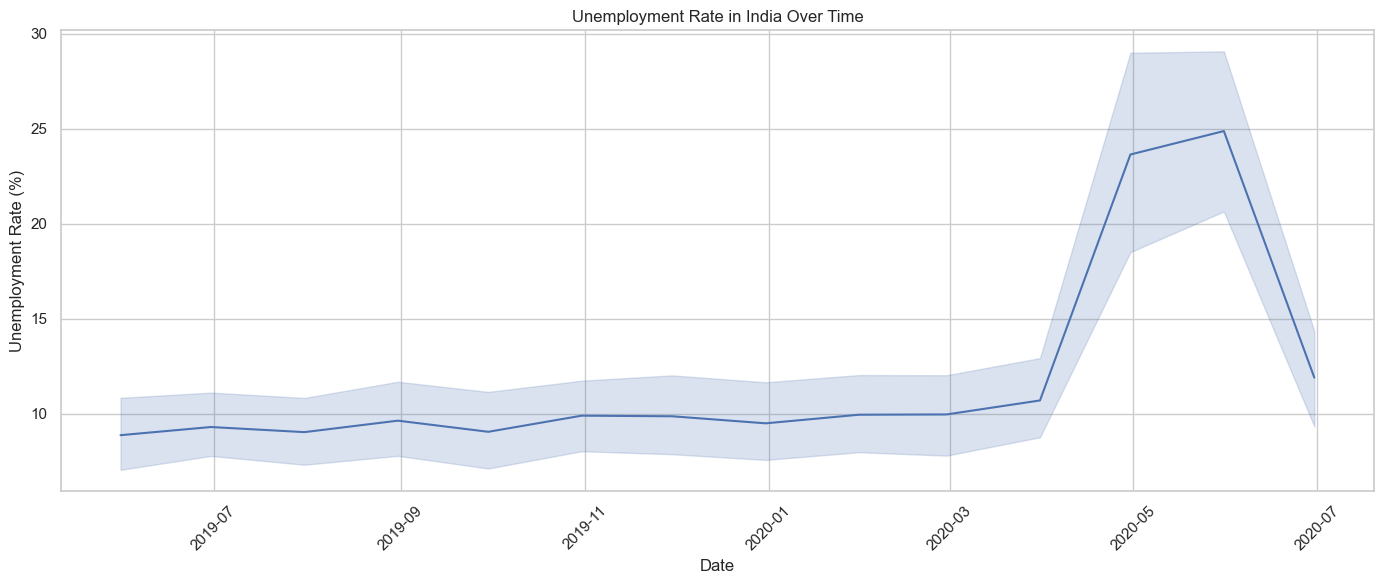

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


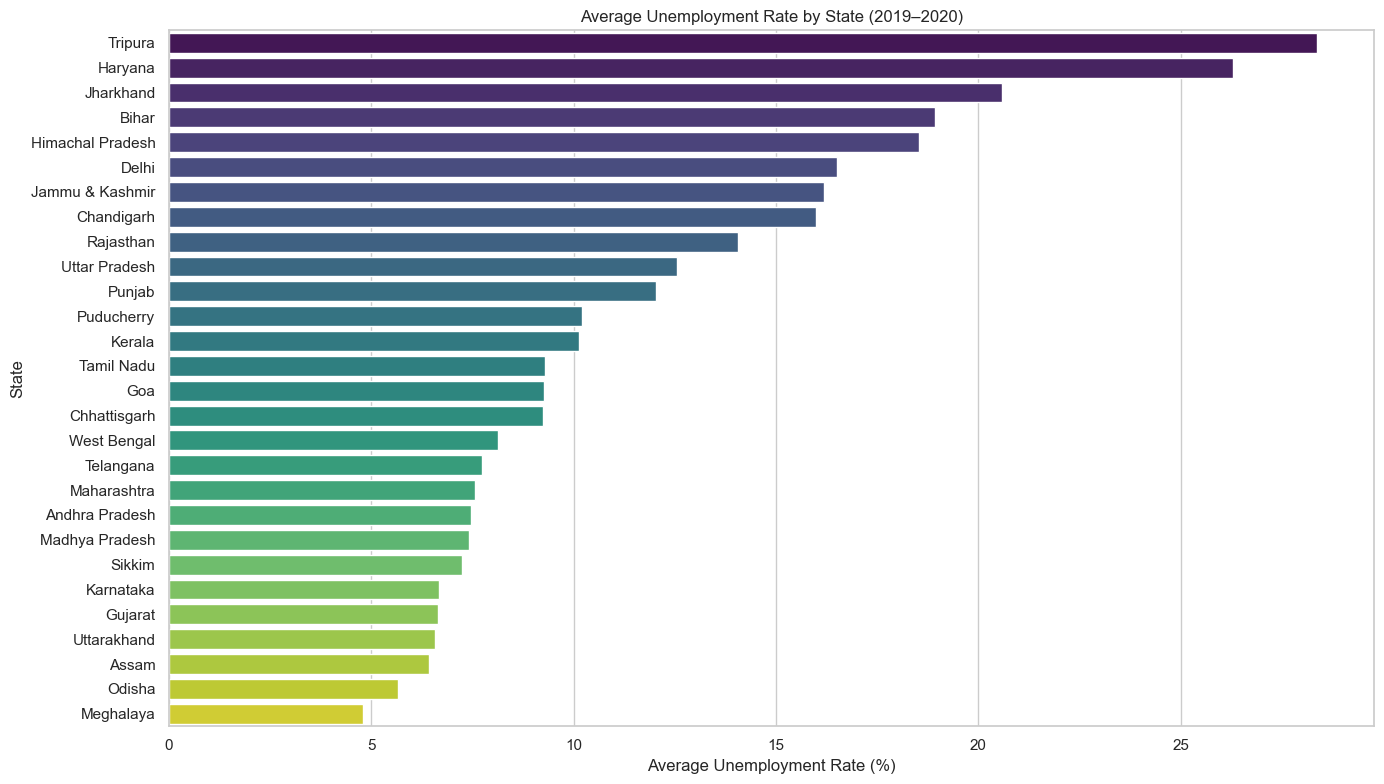

In [10]:
plt.figure(figsize=(14, 8))
state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

sns.barplot(x=state_avg.values, y=state_avg.index, hue=state_avg.index, palette="viridis", legend=False)
plt.title('Average Unemployment Rate by State (2019–2020)')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()



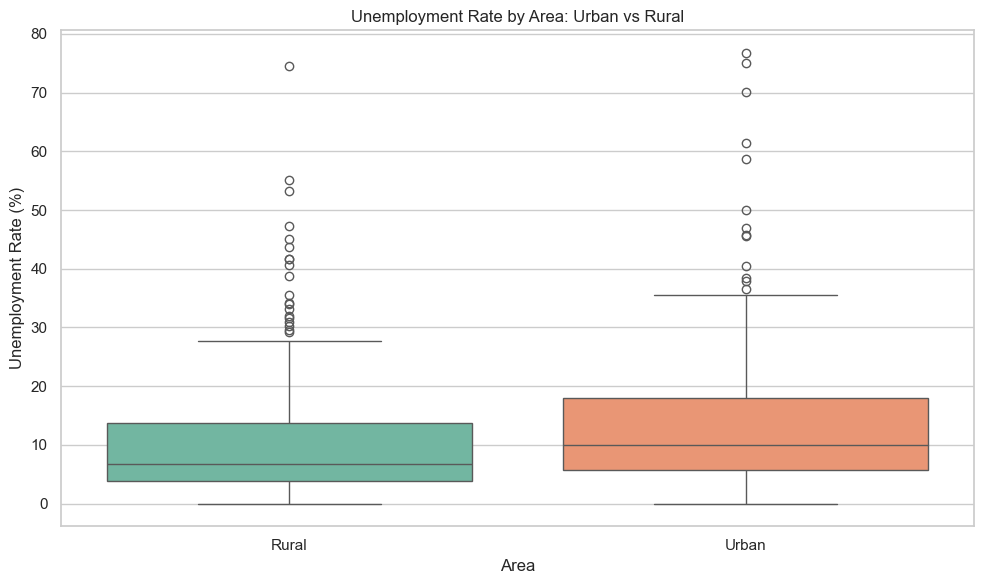

In [12]:
# Updated: Urban vs Rural unemployment with no warning
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Area', y='Estimated Unemployment Rate (%)', hue='Area', palette='Set2', legend=False)
plt.title('Unemployment Rate by Area: Urban vs Rural')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()


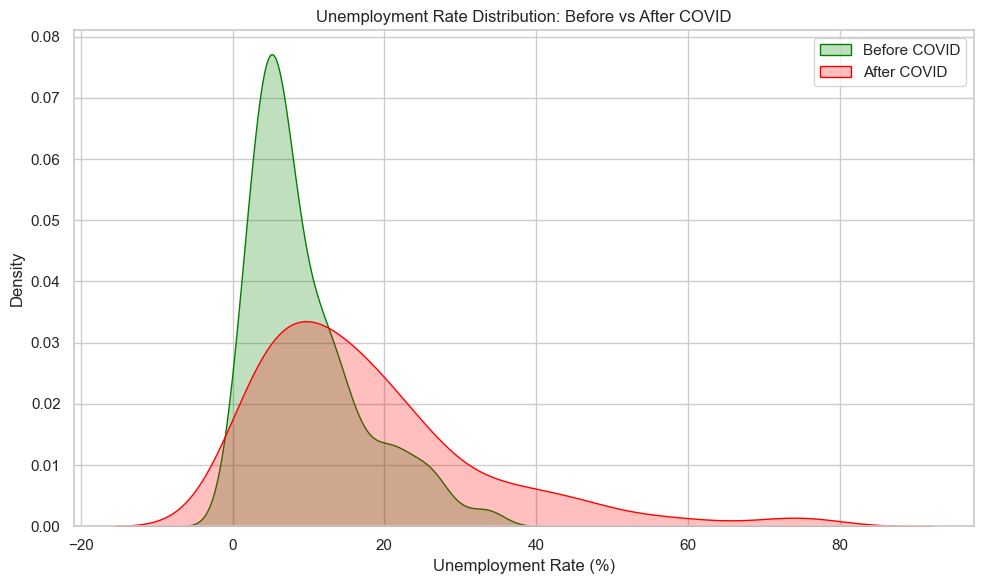

In [13]:
# Split data before and after March 2020 (start of COVID lockdown in India)
before_covid = df[df['Date'] < '2020-03-01']
after_covid = df[df['Date'] >= '2020-03-01']

# Plot comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(before_covid['Estimated Unemployment Rate (%)'], label='Before COVID', fill=True, color='green')
sns.kdeplot(after_covid['Estimated Unemployment Rate (%)'], label='After COVID', fill=True, color='red')

plt.title('Unemployment Rate Distribution: Before vs After COVID')
plt.xlabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
print("✅ Project Summary:")
print(f"- Dataset Shape: {df.shape}")
print(f"- Time Period: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"- Highest Unemployment State: {df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().idxmax()}")
print(f"- Urban Avg: {df[df['Area']=='Urban']['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"- Rural Avg: {df[df['Area']=='Rural']['Estimated Unemployment Rate (%)'].mean():.2f}%")


✅ Project Summary:
- Dataset Shape: (740, 7)
- Time Period: 2019-05-31 to 2020-06-30
- Highest Unemployment State: Tripura
- Urban Avg: 13.17%
- Rural Avg: 10.32%
